In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model

import glob, os

# Set a random seed for reproducibility
random.seed(42)

In [2]:
base_path = './data/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


In [3]:
# Parameters for Data augmentation for the training dataset
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1,
    brightness_range=[0.7, 1.3],
    rotation_range=15
)

# Parameters for Data augmentation for the rest of the datasets (test and validation)
test_datagenerator = ImageDataGenerator(
    rescale=1./255
)

In [4]:
# Apply data augmentation for the training data
train_generator = train_datagenerator.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagenerator.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
)

test_generator = test_datagenerator.flow_from_directory(
	base_path,
	target_size = (150, 150),
	batch_size = 20,
	class_mode= 'categorical')

# Map class indices to class labels
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

# Print the class labels
print("Class Labels:")
for label_index, label_name in labels.items():
    print(f"Class {label_index}: {label_name}")

Found 2276 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Class Labels:
Class 0: cardboard
Class 1: glass
Class 2: metal
Class 3: paper
Class 4: plastic
Class 5: trash


In [8]:
saved_model_path1 = './Trash1.keras'
saved_model_path2 = './Trash2.keras'
model1 = tf.keras.models.load_model(saved_model_path1)
model2 = tf.keras.models.load_model(saved_model_path2)

1/1 [==============================] - 2s 2s/step


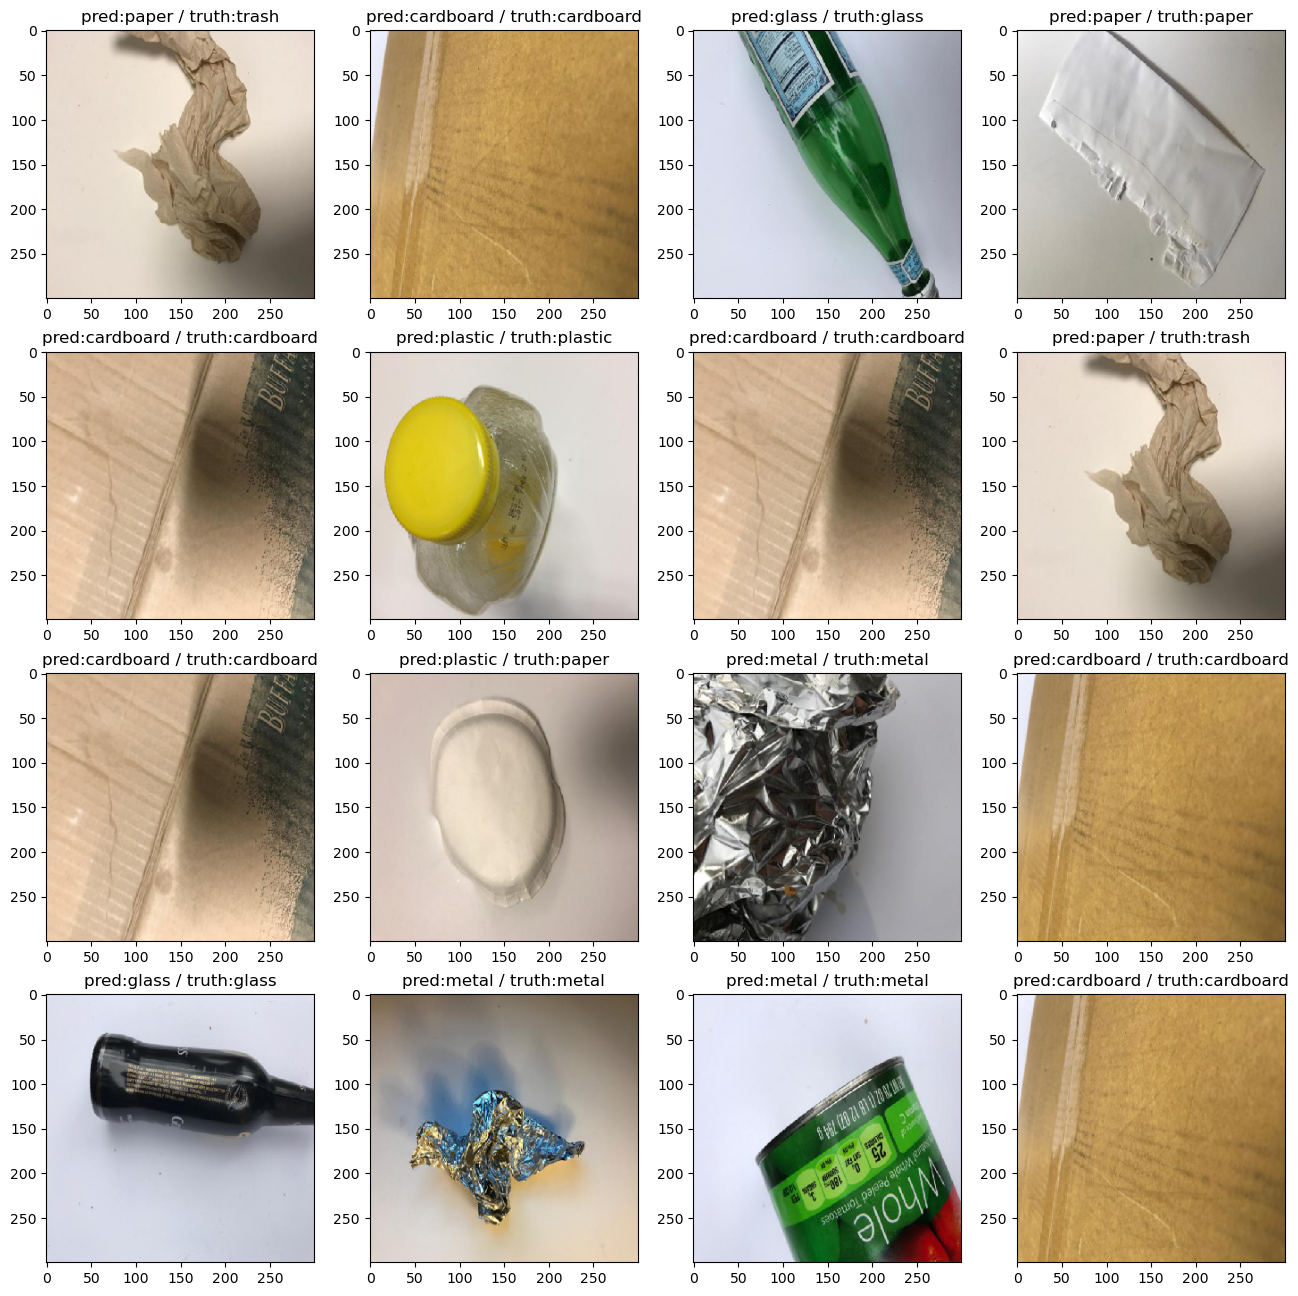

In [14]:
random_batch_index = np.random.randint(0, len(validation_generator))
test_x, test_y = validation_generator.__getitem__(random_batch_index)

preds = model1.predict(test_x)

plt.figure(figsize=(16, 16))
num_samples_to_display = 16

for i in range(num_samples_to_display):
    random_sample_index = np.random.randint(0, len(test_x))
    plt.subplot(4, 4, i + 1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[random_sample_index])], labels[np.argmax(test_y[random_sample_index])]))
    plt.imshow(test_x[random_sample_index])
plt.show()

1/1 [==============================] - 2s 2s/step


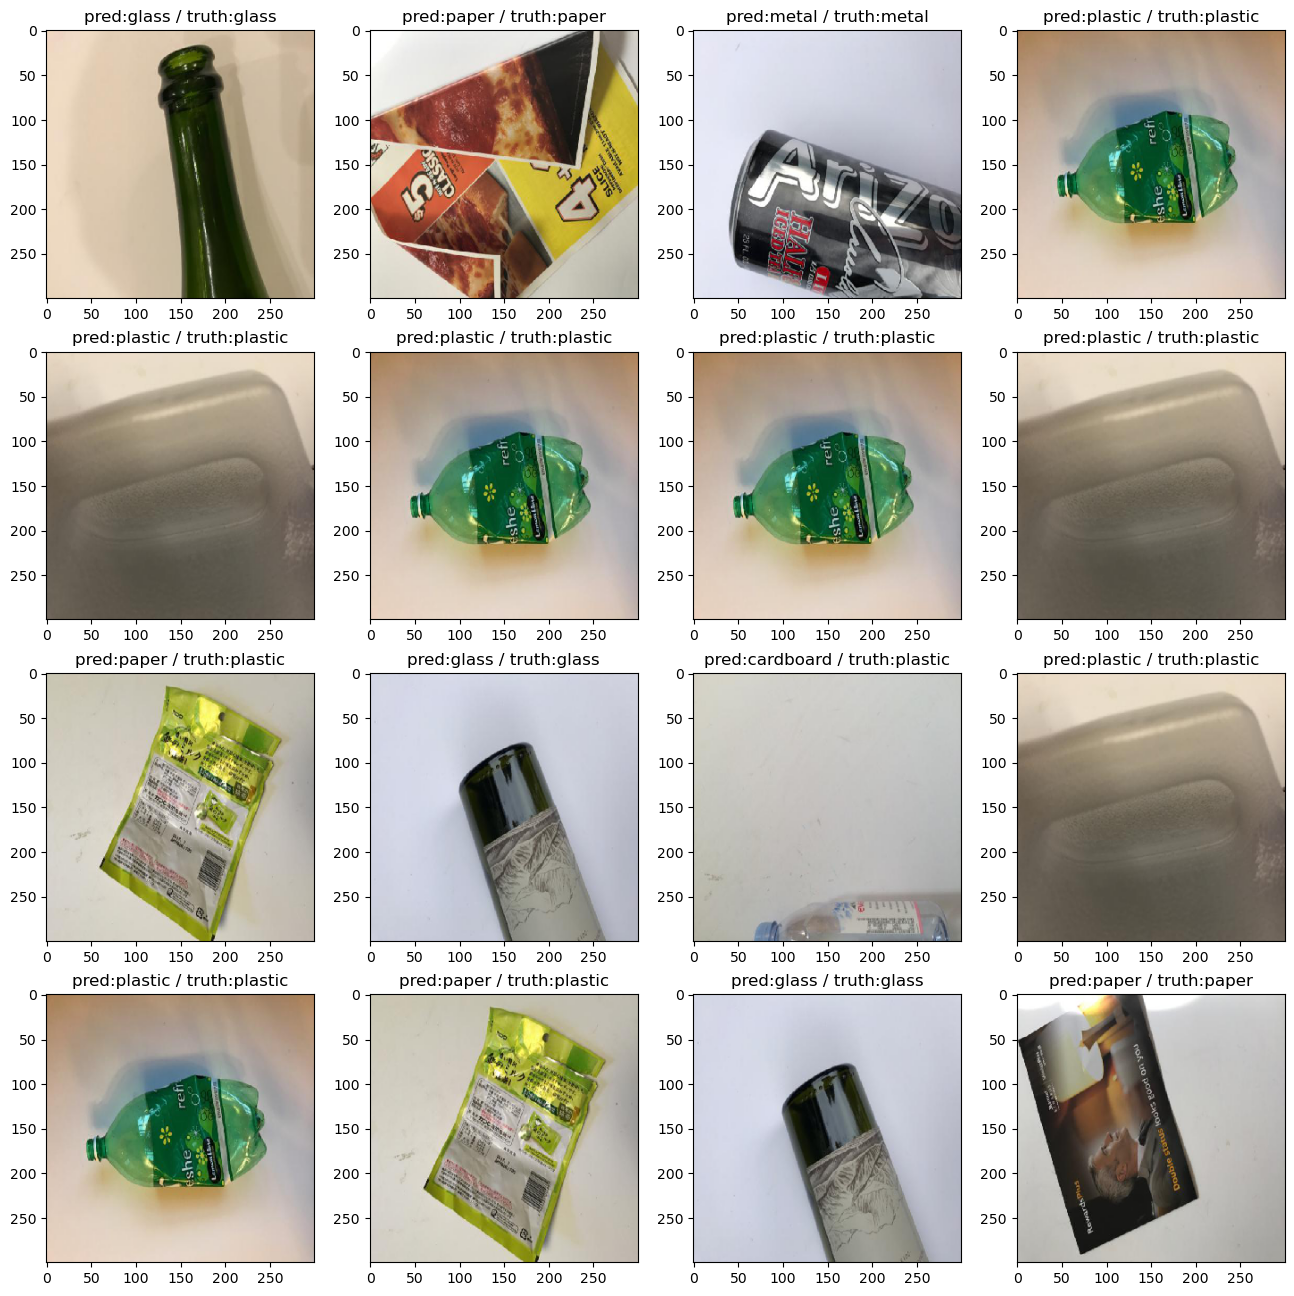

In [15]:
random_batch_index = np.random.randint(0, len(validation_generator))
test_x, test_y = validation_generator.__getitem__(random_batch_index)

preds = model2.predict(test_x)

plt.figure(figsize=(16, 16))
num_samples_to_display = 16

for i in range(num_samples_to_display):
    random_sample_index = np.random.randint(0, len(test_x))
    plt.subplot(4, 4, i + 1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[random_sample_index])], labels[np.argmax(test_y[random_sample_index])]))
    plt.imshow(test_x[random_sample_index])
plt.show()